In [150]:
# load the relevant modules for the analysis

import os
from pathlib import Path

import emcee
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pl_temp_fit import Exp_data_utils, config_utils

os.chdir("C:\\Users\\ma11115\\OneDrive - Imperial College London\\fit_pl_database_Hanbo")
# access the right directory
# os.chdir('C:\\Users\\ma11115\\OneDrive - Imperial College London\\pl_temp_fit')

In [170]:


databse_path = Path("fit_experimental_emcee_PL","fit_data_base","n=4")
json_files = list(databse_path.glob("*.json"))
list_model_config = []
for _id, json_file in enumerate(json_files):
    model_config, model_config_save = config_utils.load_model_config(
        json_file.name.replace(".json", ""),
        database_folder=databse_path,
    )
    if os.path.exists(model_config_save["save_folder"] + "/sampler.h5"):
        filename = model_config_save["save_folder"] + "/sampler.h5"
        try:
            reader = emcee.backends.HDFBackend(filename, name="multi_core")
            if not reader.initialized:
                print("multi_core empty file")
                continue
            if reader.iteration == 0:
                print("empty file")
                continue
            distribution = reader.get_chain(flat=True)
        except AttributeError:
            print("check if single core")

            reader = emcee.backends.HDFBackend(filename, name="single_core")
            if not reader.initialized:
                print("empty file")
                continue
            distribution = reader.get_chain(flat=True)

        true_parameters = list(np.mean(distribution, axis=0))
        model_config_save["mean"] = [f"{x:.3f}" for x in true_parameters]
        model_config_save["num_iteration"] = reader.iteration
        log_prob = reader.get_log_prob(flat=True)
        model_config_save["max_log_prob"] = np.max(log_prob)
        blobs = reader.get_blobs(flat=True,discard=1000)
        model_config_save["mean_lifetime"] = 1/(blobs["Ex_knr"].mean()+blobs["Ex_kr"].mean())*1e9

        list_model_config.append(model_config_save)
if len(list_model_config) == 0:
    print("no data")
else:
    df_all = pd.DataFrame(list_model_config)
    df_all.sort_values(by="date", ascending=False, inplace=True)
df_all[["csv_name_pl", "num_iteration", "max_log_prob","mean_lifetime"]]

,csv_name_pl,num_iteration,max_log_prob,mean_lifetime
0,cryostat/60-300K/PYIT-300K_G0_650.0nm_1500.0nm...,10000,-449.690195,NaN
20,cryostat/60-300K/Y5-soln.csv,10000,-815.013182,NaN
45,cryostat/60-300K/L8BO-fresh-300K_G0_750.0nm_13...,10000,-405.887301,NaN
41,cryostat/60-300K/PYIT-300K_G0_650.0nm_1500.0nm...,10000,-486.130113,NaN
37,cryostat/60-300K/IEICO_cb-300K_G0_750.0nm_1600...,6000,-812.769442,0.858415
34,cryostat/60-300K/ITIC-300K-2_G0_650.0nm_1450.0...,10000,-392.047942,NaN
33,cryostat/60-300K/Y6DIB-1mat-300K_G0_700.0nm_15...,10000,-532.897665,2.349380
32,cryostat/60-300K/L8BO-fresh-300K_G0_750.0nm_13...,6400,-393.074846,2.711895
31,cryostat/60-300K/L8BO-fresh-300K_G0_750.0nm_13...,6465,-359.926698,NaN
28,cryostat/60-300K/PYIT-300K_G0_650.0nm_1500.0nm...,10000,-547.582787,0.039079


In [171]:
search_for = "IEICO"
df_all[df_all["csv_name_pl"].str.contains(search_for)][["csv_name_pl", "num_iteration", "max_log_prob","mean_lifetime"]]

,csv_name_pl,num_iteration,max_log_prob,mean_lifetime
37,cryostat/60-300K/IEICO_cb-300K_G0_750.0nm_1600...,6000,-812.769442,0.858415
26,cryostat/60-300K/IEICOcn-2_cb-300K_G0_750.0nm_...,10000,-566.579389,1.801175
24,cryostat/60-300K/IEICO_cb-300K_G0_750.0nm_1600...,6400,-1052.224251,1.022859
1,cryostat/60-300K/IEICO_cb-300K_G0_750.0nm_1600...,8900,-1184.235001,0.988221
8,cryostat/60-300K/IEICOcn-2_cb-300K_G0_750.0nm_...,9600,-507.455616,0.178981
15,cryostat/60-300K/IEICOcn-2_cb-300K_G0_750.0nm_...,10000,-639.408374,0.000309
43,cryostat/60-300K/IEICOcn-2_cb-300K_G0_750.0nm_...,10000,-584.167967,1.037119
10,cryostat/60-300K/IEICO_cb-300K_G0_750.0nm_1600...,10000,-978.656102,0.373679
44,cryostat/60-300K/IEICOcn-2_cb-300K_G0_750.0nm_...,8702,-509.384574,2.177762
22,cryostat/60-300K/IEICO_cb-300K_G0_750.0nm_1600...,9970,-982.472768,0.723542


In [144]:
index_analyse_list = [6,15,28,20,3]
label_list = ["ITIC","IT-4F","Y6","L8BO","IEICO"]
color_list = ["blue","#069AF3","crimson","coral","green","lightgreen"]
df_all[["csv_name_pl", "num_iteration", "max_log_prob"]].loc[index_analyse_list]


,csv_name_pl,num_iteration,max_log_prob
6,cryostat/60-300K/ITIC-300K-2_G0_650.0nm_1450.0...,10000,-365.525624
15,cryostat/60-300K/IT4FDIO-300K-9_G0_650.0nm_145...,7700,-756.805051
28,cryostat/60-300K/Y6DIB-1mat-300K_G0_700.0nm_15...,10000,-589.679764
20,cryostat/60-300K/L8BO-fresh-300K_G0_750.0nm_13...,6400,-393.074846
3,cryostat/60-300K/IEICOcn-2_cb-300K_G0_750.0nm_...,9600,-507.455616


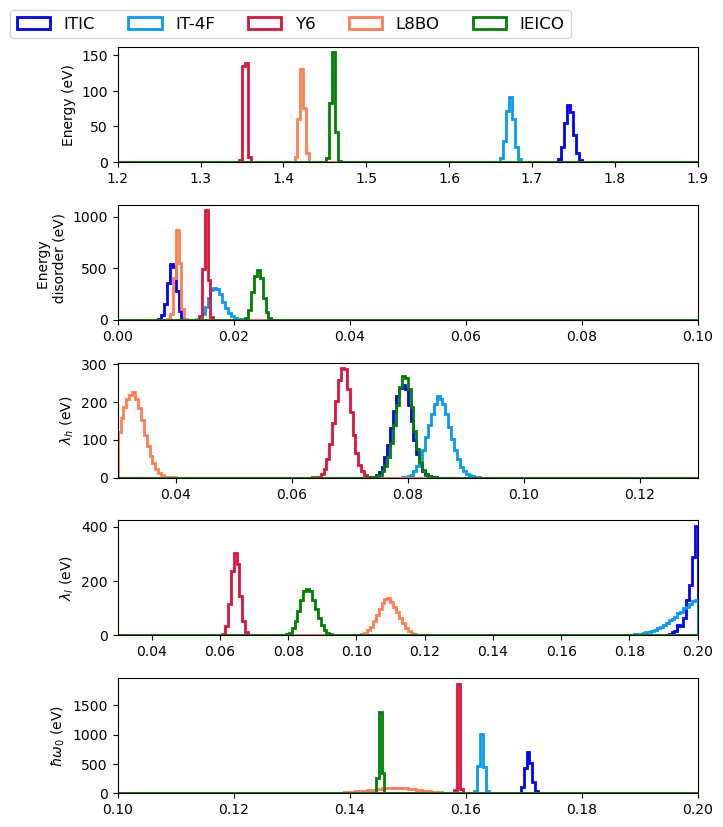

In [145]:
import importlib
from pl_temp_fit import plot_utils

def plot_distribution_multi(
    reader, model_config_save, discard=10, filter_log_likelihood=True,
    fig=None,axes=None,legend_label='test',color='C1'
):
    """plot the distribution of the parameters from the sampling output
    reader: the reader object from the emcee sampler
    model_config_save: the model config save dictionary
    discard: the number of samples to discard
    """
    label_list = []
    for key in model_config_save["params_to_fit_init"].keys():
        label_list.extend(
            [
                key + "_" + x
                for x in model_config_save["params_to_fit_init"][key].keys()
            ]
        )
    labels = label_list
    ndim = len(labels)

    distribution = reader.get_chain(discard=discard, flat=True)
    if filter_log_likelihood:
        blobs = reader.get_blobs(flat=True, discard=discard)
        distribution = distribution[
            blobs["log_likelihood"] > max(blobs["log_likelihood"]) * 1.05
        ]
    if fig is None:
        fig, axes = plt.subplots(5, figsize=(12, 12))
    axes_xlim = [[1.2, 1.9], [0, 0.1], [0.03, 0.13], [0.03, 0.2], [0.1, 0.2]]
    for i in range(ndim):
        ax = axes[i]
        ax.hist(
            distribution[:, i],
            200,
            color=color,
            linewidth=2,
            histtype="step",
            label=legend_label,
            range = (axes_xlim[i][0],axes_xlim[i][1]),
            density=True,
        )
        ax.set_ylabel(labels[i])
        ax.set_xlim(axes_xlim[i])
    axes[0].legend(loc="center left", bbox_to_anchor=(1, 0.5))
    fig.tight_layout()
    return fig, axes

importlib.reload(plot_utils)
fig, axes = plt.subplots(5, figsize=(13, 8))
for i, index_analyse in enumerate(index_analyse_list):
    test_id = df_all["test_id"].loc[index_analyse]
    label = (
        df_all["csv_name_pl"]
        .loc[index_analyse]
        .split("/")[-1]
        .replace(".csv", "")
        .replace("_mod_split", " ")
        .replace("_split", " ")
    )
    model_config, model_config_save = config_utils.load_model_config(
        test_id, database_folder=databse_path
    )
    filename = model_config_save["save_folder"] + "/sampler.h5"
    reader = emcee.backends.HDFBackend(filename, name="multi_core")
    fig, ax = plot_distribution_multi(
        reader,
        model_config_save,
        discard=200,
        filter_log_likelihood=True,
        fig=fig,
        axes=axes,
        color=color_list[i],
        legend_label=label,
    )
ax[0].set_ylabel("Energy (eV)")
ax[1].set_ylabel("Energy \n  disorder (eV)")
ax[2].set_ylabel("$\lambda_{h}$ (eV)")
ax[3].set_ylabel("$\lambda_{l}$ (eV)")
ax[4].set_ylabel("$\hbar \omega_{0}$ (eV)")
ax[0].legend(label_list,loc="center left",ncols=7,bbox_to_anchor=(-0.2, 1.2),fontsize=12)


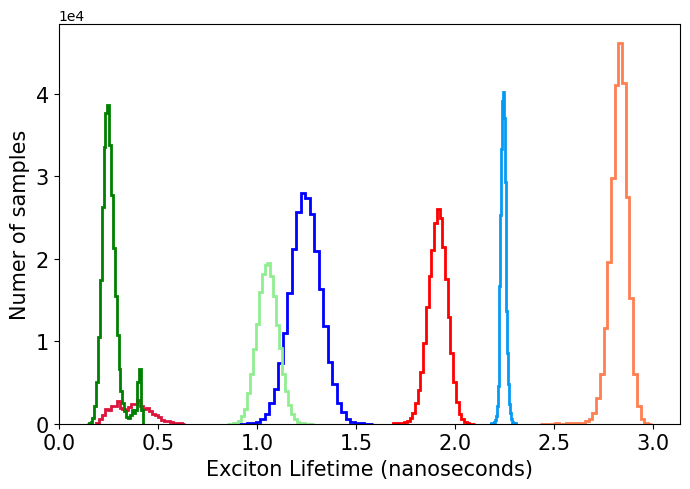

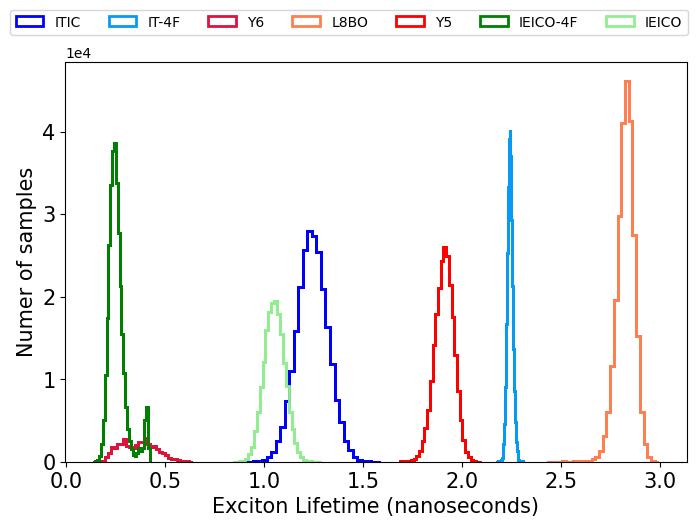

In [78]:
def plot_lifetime_multi(
    reader,
    range_chi_square=(7, 11),
    range_log_prior=(7, 11),
    discard=5,
    temperature=300,
    filter_log_likelihood=False,
):
    """plot the lifetime distribution from the sampling output
    reader: the reader object from the emcee sampler
    range_chi_square: the range for the chi square plot
    range_log_prior: the range for the log prior plot
    discard: the number of samples to discard
    temperature: the temperature at which the lifetime is calculated
    """

    for i, index_analyse in enumerate(index_analyse_list):
        test_id = df_all["test_id"].loc[index_analyse]
        label = (
            df_all["csv_name_pl"]
            .loc[index_analyse]
            .split("/")[-1]
            .replace(".csv", "")
            .replace("_mod_split", " ")
            .replace("_split", " ")
        )
        model_config, model_config_save = config_utils.load_model_config(
            test_id, database_folder=databse_path
        )
        filename = model_config_save["save_folder"] + "/sampler.h5"
        reader = emcee.backends.HDFBackend(filename, name="multi_core")
        blobs = reader.get_blobs(flat=True, discard=discard)
        if filter_log_likelihood:
            blobs = blobs[
                blobs["log_likelihood"] > max(blobs["log_likelihood"]) * 1.1
            ]
        lifetime = 1 / (blobs["Ex_kr"] + blobs["Ex_knr"])
        ax.hist(
            lifetime * 1e9,
            30,
            histtype="step",
            color=color_list[i],
            linewidth=2,
        )
        ax.set_xlabel("Exciton Lifetime (nanoseconds)", fontsize=15)
        ax.set_ylabel("Numer of samples", fontsize=15)
        ax.xaxis.set_tick_params(labelsize=15)
        ax.yaxis.set_tick_params(labelsize=15)
        
        # set y ticks to exponent form
        ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    fig.tight_layout()
    plt.show()
    return fig, ax
importlib.reload(plot_utils)
fig, ax = plt.subplots(1,1, figsize=(7, 5))

for i, index_analyse in enumerate(index_analyse_list):
    test_id = df_all["test_id"].loc[index_analyse]
    label = (
        df_all["csv_name_pl"]
        .loc[index_analyse]
        .split("/")[-1]
        .replace(".csv", "")
        .replace("_mod_split", " ")
        .replace("_split", " ")
    )
    model_config, model_config_save = config_utils.load_model_config(
        test_id, database_folder=databse_path
    )
    filename = model_config_save["save_folder"] + "/sampler.h5"
    reader = emcee.backends.HDFBackend(filename, name="multi_core")
    fig, ax = plot_lifetime_multi(reader, discard=100, filter_log_likelihood=True,range_log_prior=[8, 10])
ax.legend(label_list,loc="center left",ncols=7,bbox_to_anchor=(-0.1, 1.1),fontsize=10)  
fig

In [79]:
search_for = "Y6"
df_all[df_all["csv_name_pl"].str.contains(search_for)][["csv_name_pl", "num_iteration", "max_log_prob"]]

,csv_name_pl,num_iteration,max_log_prob
15,cryostat/60-300K/Y6_1mat_300_G0_700.0nm_1500.0...,10000,-3047.182152
36,cryostat/60-300K/Y6DIB-1mat-300K_G0_700.0nm_15...,10000,-542.313146
33,cryostat/60-300K/Y6_1mat_300_G0_700.0nm_1500.0...,5500,-414.835548
31,cryostat/60-300K/Y6_1mat_300_G0_700.0nm_1500.0...,10000,-3032.228166
30,cryostat/60-300K/Y6DIB-1mat-300K_G0_700.0nm_15...,10000,-8481.649811
28,cryostat/60-300K/Y6_1mat_300_G0_700.0nm_1500.0...,10000,-400.507216
24,cryostat/60-300K/Y6DIO_1mat_sameday_300_G0_700...,10000,-451.083766
14,cryostat/60-300K/Y6DIO_1mat_sameday_300_G0_700...,10000,-3086.023440
10,cryostat/60-300K/Y6DIO_1mat_sameday_300_G0_700...,6900,-446.200021
5,cryostat/60-300K/Y6DIO_1mat_sameday_300_G0_700...,8500,-411.143830


In [33]:
index_analyse_list = [28,24,36,27]
label_list = ["Film","Film + DIO","Film + DIB","Solution"]
color_list = ["C1","C2","C3","C4","C5","C6","C7"]
df_all[["csv_name_pl", "num_iteration", "max_log_prob"]].loc[index_analyse_list]


,csv_name_pl,num_iteration,max_log_prob
28,cryostat/60-300K/Y6_1mat_300_G0_700.0nm_1500.0...,10000,-400.507216
24,cryostat/60-300K/Y6DIO_1mat_sameday_300_G0_700...,10000,-451.083766
36,cryostat/60-300K/Y6DIB-1mat-300K_G0_700.0nm_15...,10000,-542.313146
27,cryostat/60-300K/Y6-soln.csv,10000,-511.557105


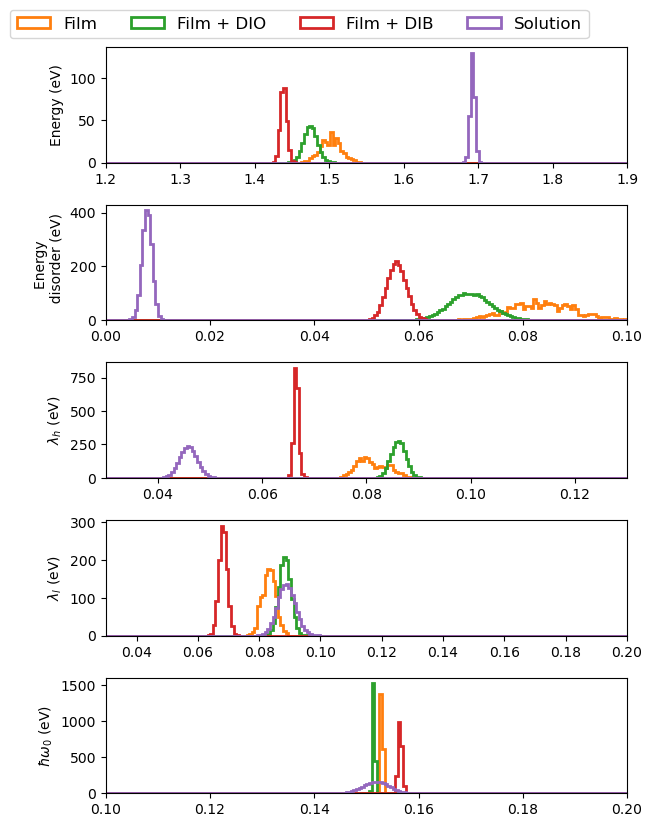

In [34]:

importlib.reload(plot_utils)
fig, axes = plt.subplots(5, figsize=(13, 8))
for i, index_analyse in enumerate(index_analyse_list):
    test_id = df_all["test_id"].loc[index_analyse]
    label = (
        df_all["csv_name_pl"]
        .loc[index_analyse]
        .split("/")[-1]
        .replace(".csv", "")
        .replace("_mod_split", " ")
        .replace("_split", " ")
    )
    model_config, model_config_save = config_utils.load_model_config(
        test_id, database_folder=databse_path
    )
    filename = model_config_save["save_folder"] + "/sampler.h5"
    reader = emcee.backends.HDFBackend(filename, name="multi_core")
    fig, ax = plot_distribution_multi(
        reader,
        model_config_save,
        discard=200,
        filter_log_likelihood=True,
        fig=fig,
        axes=axes,
        color=color_list[i],
        legend_label=label,
    )
ax[0].set_ylabel("Energy (eV)")
ax[1].set_ylabel("Energy \n  disorder (eV)")
ax[2].set_ylabel("$\lambda_{h}$ (eV)")
ax[3].set_ylabel("$\lambda_{l}$ (eV)")
ax[4].set_ylabel("$\hbar \omega_{0}$ (eV)")
ax[0].legend(label_list,loc="center left",ncols=7,bbox_to_anchor=(-0.2, 1.2),fontsize=12)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


number of iterations 9905
-340.50077883210804
number of iterations 7500


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


-280.7151338824931
number of iterations 10000
-499.4884152413583


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


number of iterations 10000
-420.64918003479545


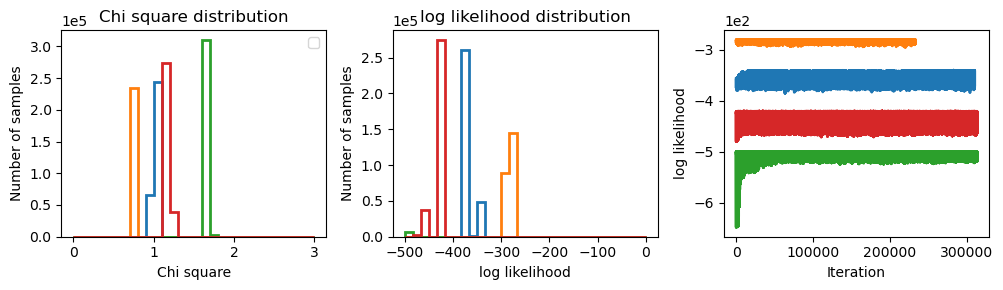

In [15]:

fig, ax = plt.subplots(1, 3, figsize=(10, 3))
for i, index_analyse in enumerate(index_analyse_list):
    test_id = df_all["test_id"].loc[index_analyse]
    label = (
        df_all["csv_name_pl"]
        .loc[index_analyse]
        .split("/")[-1]
        .replace(".csv", "")
        .replace("_mod_split", " ")
        .replace("_split", " ")
    )
    model_config, model_config_save = config_utils.load_model_config(
        test_id, database_folder=databse_path
    )
    filename = model_config_save["save_folder"] + "/sampler.h5"
    reader = emcee.backends.HDFBackend(filename, name="multi_core")
    fig, ax = plot_utils.plot_fit_statistics_multi(
        reader,
        range_log_prior=(-500, 0),
        discard=200,
        range_chi_square=(0, 3),
        filter_log_likelihood=True,
        fig=fig,
        ax=ax,
        legend_label="",
        color=f"C{i}",
    )

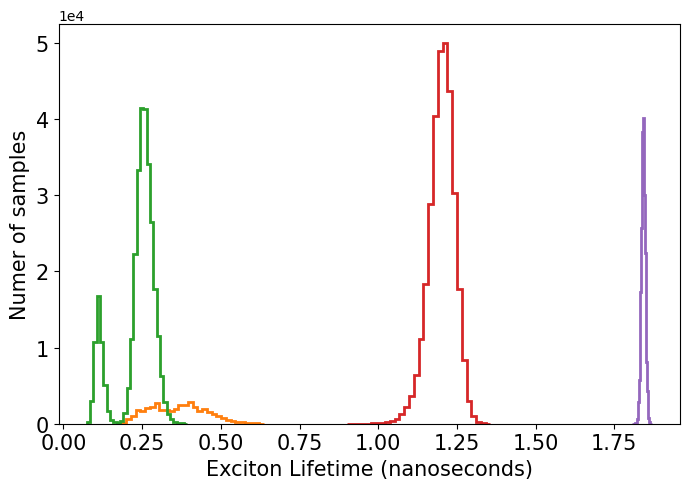

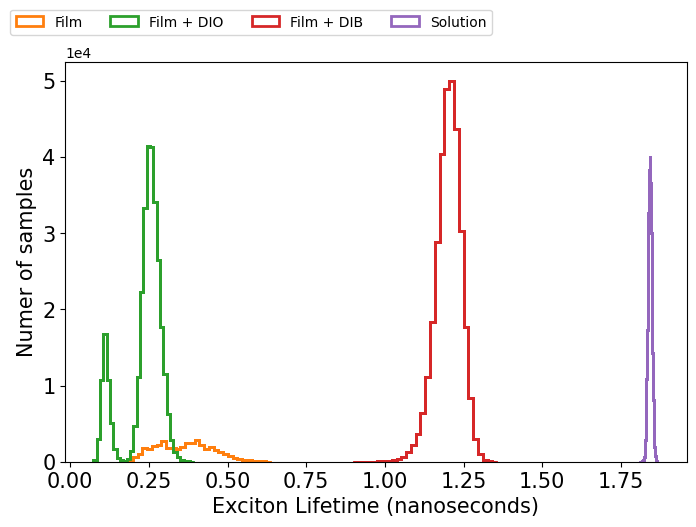

In [35]:
def plot_lifetime_multi(
    reader,
    range_chi_square=(7, 11),
    range_log_prior=(7, 11),
    discard=5,
    temperature=300,
    filter_log_likelihood=False,
):
    """plot the lifetime distribution from the sampling output
    reader: the reader object from the emcee sampler
    range_chi_square: the range for the chi square plot
    range_log_prior: the range for the log prior plot
    discard: the number of samples to discard
    temperature: the temperature at which the lifetime is calculated
    """

    for i, index_analyse in enumerate(index_analyse_list):
        test_id = df_all["test_id"].loc[index_analyse]
        label = (
            df_all["csv_name_pl"]
            .loc[index_analyse]
            .split("/")[-1]
            .replace(".csv", "")
            .replace("_mod_split", " ")
            .replace("_split", " ")
        )
        model_config, model_config_save = config_utils.load_model_config(
            test_id, database_folder=databse_path
        )
        filename = model_config_save["save_folder"] + "/sampler.h5"
        reader = emcee.backends.HDFBackend(filename, name="multi_core")
        blobs = reader.get_blobs(flat=True, discard=discard)
        if filter_log_likelihood:
            blobs = blobs[
                blobs["log_likelihood"] > max(blobs["log_likelihood"]) * 1.1
            ]
        lifetime = 1 / (blobs["Ex_kr"] + blobs["Ex_knr"])
        ax.hist(
            lifetime * 1e9,
            30,
            histtype="step",
            color=color_list[i],
            linewidth=2,
        )
        ax.set_xlabel("Exciton Lifetime (nanoseconds)", fontsize=15)
        ax.set_ylabel("Numer of samples", fontsize=15)
        ax.xaxis.set_tick_params(labelsize=15)
        ax.yaxis.set_tick_params(labelsize=15)
        
        # set y ticks to exponent form
        ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    fig.tight_layout()
    plt.show()
    return fig, ax
importlib.reload(plot_utils)
fig, ax = plt.subplots(1,1, figsize=(7, 5))

for i, index_analyse in enumerate(index_analyse_list):
    test_id = df_all["test_id"].loc[index_analyse]
    label = (
        df_all["csv_name_pl"]
        .loc[index_analyse]
        .split("/")[-1]
        .replace(".csv", "")
        .replace("_mod_split", " ")
        .replace("_split", " ")
    )
    model_config, model_config_save = config_utils.load_model_config(
        test_id, database_folder=databse_path
    )
    filename = model_config_save["save_folder"] + "/sampler.h5"
    reader = emcee.backends.HDFBackend(filename, name="multi_core")
    fig, ax = plot_lifetime_multi(reader, discard=100, filter_log_likelihood=True,range_log_prior=[8, 10])
ax.legend(label_list,loc="center left",ncols=7,bbox_to_anchor=(-0.1, 1.1),fontsize=10)  
fig

cryostat/60-300K/Y6_1mat_300_G0_700.0nm_1500.0nm_20-06-2024-16h-21m_Exposure_3.0s.csv


Text(0.5, 0.98, '')

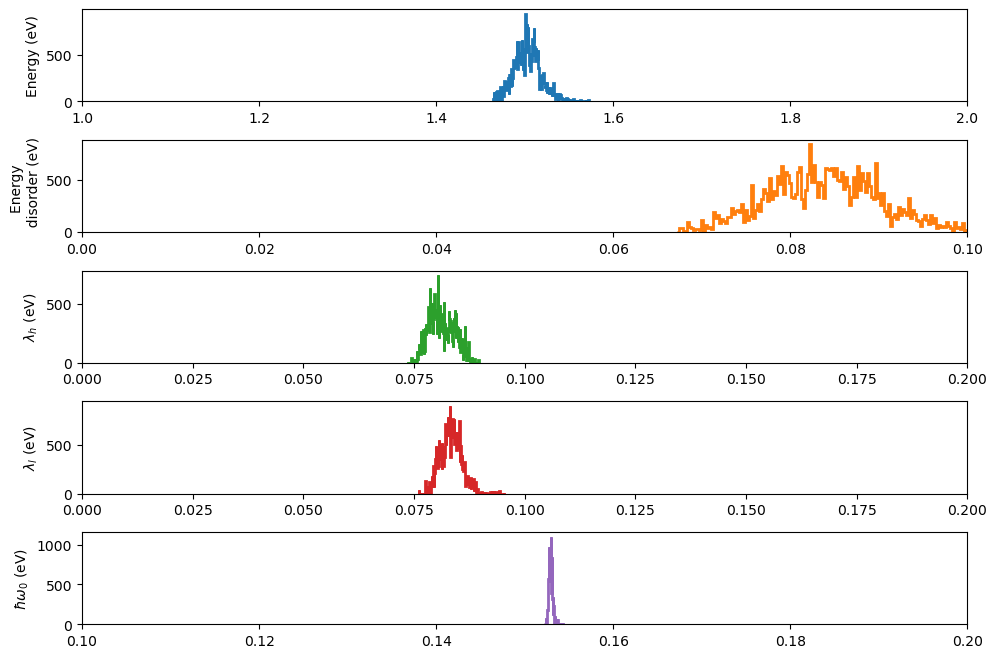

In [41]:
def plot_distribution(
    reader, model_config_save, discard=10, filter_log_likelihood=False,
    fig=None,axes=None
):
    """plot the distribution of the parameters from the sampling output
    reader: the reader object from the emcee sampler
    model_config_save: the model config save dictionary
    discard: the number of samples to discard
    """
    csv_name = model_config_save["csv_name_pl"]
    label_list = []
    for key in model_config_save["params_to_fit_init"].keys():
        label_list.extend(
            [
                key + "_" + x
                for x in model_config_save["params_to_fit_init"][key].keys()
            ]
        )
    labels = label_list
    ndim = len(labels)

    distribution = reader.get_chain(discard=discard, flat=True)
    if filter_log_likelihood:
        blobs = reader.get_blobs(flat=True, discard=discard)
        distribution_plot = distribution[
            blobs["log_likelihood"] > max(blobs["log_likelihood"])*1.1
        ]
    if fig is None:
        fig, axes = plt.subplots(5, figsize=(10, 7))
    axes_xlim = [[1, 2], [0, 0.1], [0, 0.2], [0, 0.2], [0.1, 0.2]]
    for i in range(ndim):
        ax = axes[i]
        ax.hist(
            distribution_plot[:, i],
            200,
            color="C" + str(i),
            linewidth=2,
            histtype="step",
            
        )
        ax.set_ylabel(labels[i])
        ax.set_xlim(axes_xlim[i])
    fig.suptitle(f"Sampler distribution for {csv_name.split('/')[-1]}")
    fig.tight_layout()
    print(csv_name)
    return fig, axes
index_analyse = 28
test_id = df_all["test_id"].loc[index_analyse]
model_config, model_config_save = config_utils.load_model_config(
    test_id, database_folder=databse_path
)
filename = model_config_save["save_folder"] + "/sampler.h5"
reader = emcee.backends.HDFBackend(filename, name="multi_core")
distribution = reader.get_chain(discard=0, flat=True)
fig,ax = plot_distribution(
    reader, model_config_save, discard=200, filter_log_likelihood=True
)
ax[0].set_ylabel("Energy (eV)")
ax[1].set_ylabel("Energy \n  disorder (eV)")
ax[2].set_ylabel("$\lambda_{h}$ (eV)")
ax[3].set_ylabel("$\lambda_{l}$ (eV)")
ax[4].set_ylabel("$\hbar \omega_{0}$ (eV)")
fig.suptitle("")

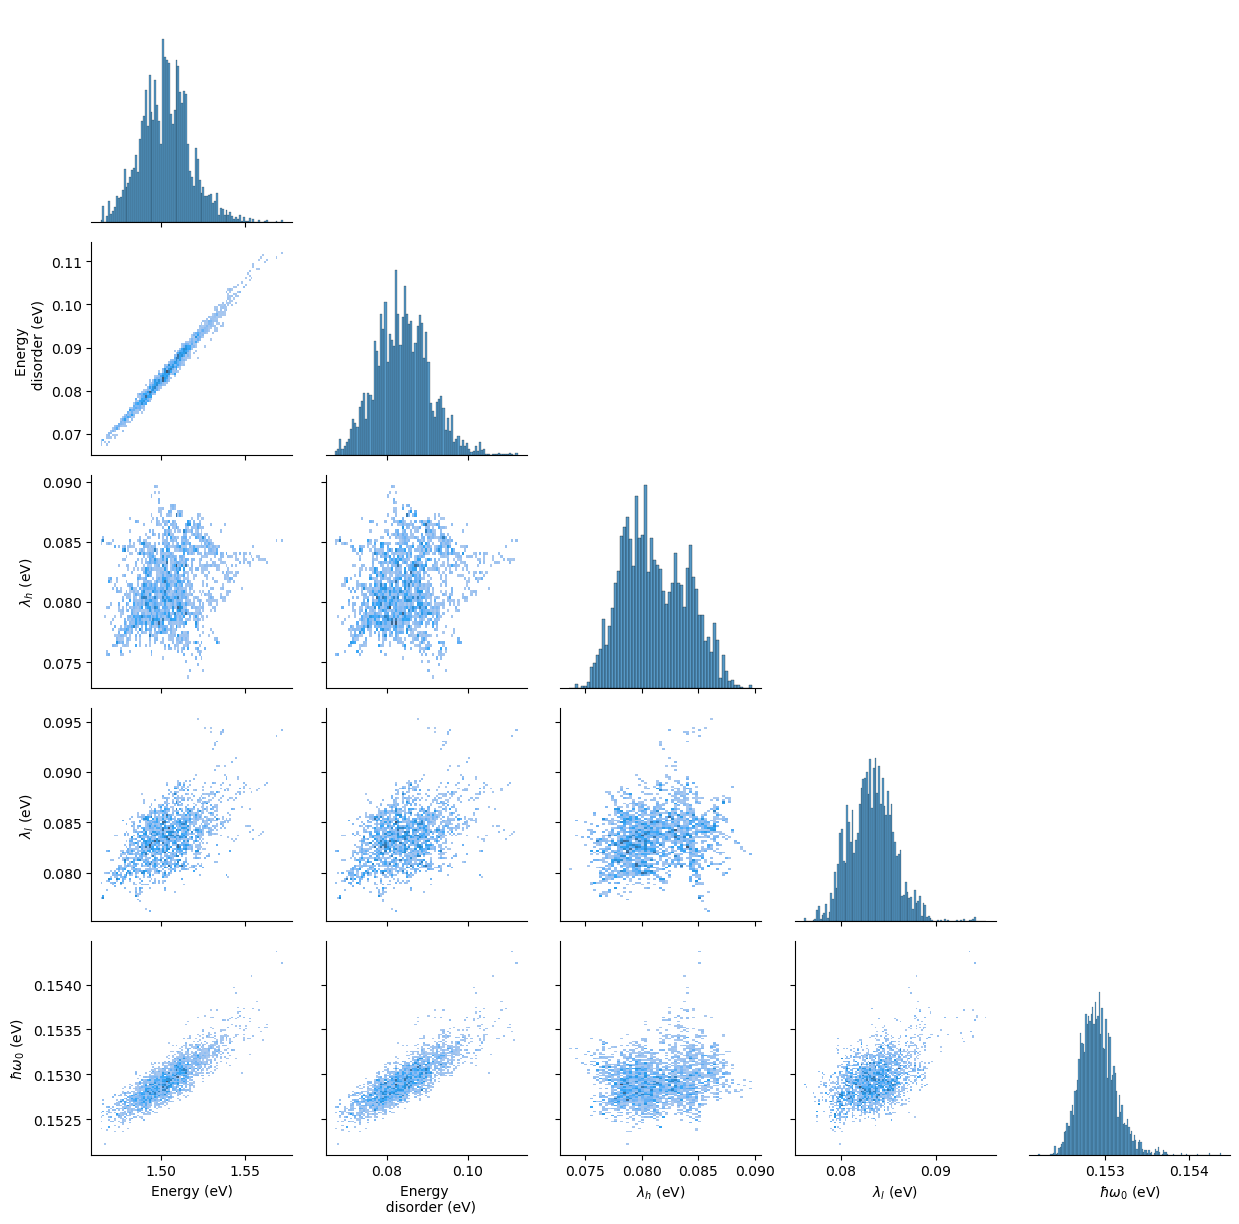

In [43]:
import seaborn as sns

def plot_corner(reader, model_config_save, discard=10,
                filter_log_likelihood=False):
    """plot the corner plot from the sampling output
    reader: the reader object from the emcee sampler
    model_config_save: the model config save dictionary
    discard: the number of samples to discard
    """
    label_list = []
    for key in model_config_save["params_to_fit_init"].keys():
        label_list.extend(
            [
                key + "_" + x
                for x in model_config_save["params_to_fit_init"][key].keys()
            ]
        )
    labels = label_list
    samples = reader.get_chain(discard=discard, flat=True)
    if filter_log_likelihood:
        blobs = reader.get_blobs(flat=True, discard=discard)
        samples = samples[
            blobs["log_likelihood"] > max(blobs["log_likelihood"]) * 1.1
        ]
    df_samples = pd.DataFrame(samples, columns=labels)
    g = sns.pairplot(df_samples, kind="hist", corner=True)
    #g.fig.suptitle(f"Sampler corner plot for {csv_name.split('/')[-1]}")
    return g.fig, g.axes


fig, ax = plot_corner(
    reader, model_config_save, discard=200, filter_log_likelihood=True
)

ax[4][0].set_xlabel("Energy (eV)")
ax[4][1].set_xlabel("Energy \n  disorder (eV)")
ax[4][2].set_xlabel("$\lambda_{h}$ (eV)")
ax[4][3].set_xlabel("$\lambda_{l}$ (eV)")
ax[4][4].set_xlabel("$\hbar \omega_{0}$ (eV)")

ax[1][0].set_ylabel("Energy \n  disorder (eV)")
ax[2][0].set_ylabel("$\lambda_{h}$ (eV)")
ax[3][0].set_ylabel("$\lambda_{l}$ (eV)")
ax[4][0].set_ylabel("$\hbar \omega_{0}$ (eV)")
fig.suptitle("")
fig.tight_layout()

number of iterations 10000


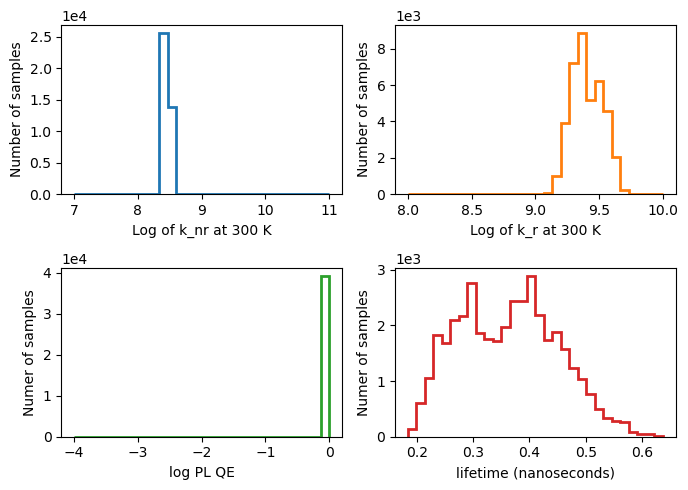

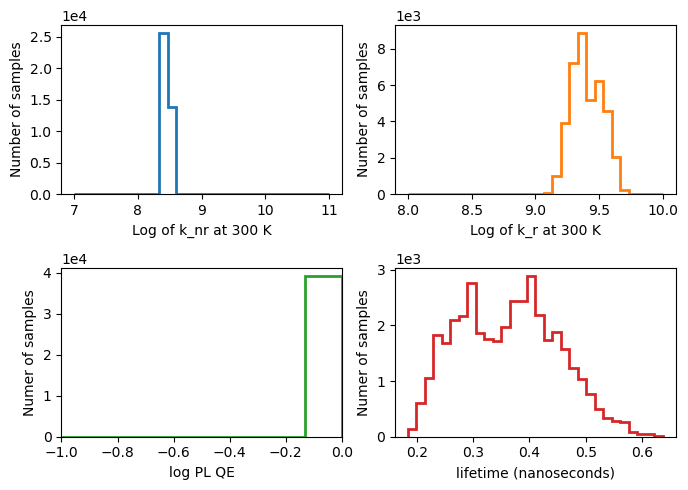

In [45]:
def plot_lifetime(
    reader,
    range_chi_square=(7, 11),
    range_log_prior=(7, 11),
    discard=5,
    temperature=300,
    filter_log_likelihood=False,
):
    """plot the lifetime distribution from the sampling output
    reader: the reader object from the emcee sampler
    range_chi_square: the range for the chi square plot
    range_log_prior: the range for the log prior plot
    discard: the number of samples to discard
    temperature: the temperature at which the lifetime is calculated
    """
    print("number of iterations", reader.iteration)
    blobs = reader.get_blobs(flat=True, discard=discard)
    if filter_log_likelihood:
        blobs = blobs[
            blobs["log_likelihood"] > max(blobs["log_likelihood"]) * 1.1
        ]
    fig, ax = plt.subplots(2, 2, figsize=(7, 5))

    ax = ax.flatten()
    ax[0].hist(
        np.log10(blobs["Ex_knr"]),
        30,
        histtype="step",
        range=range_chi_square,
        color="C" + str(0),
        linewidth=2,
    )
    ax[0].set_xlabel("Log of k_nr at " + str(temperature) + " K")
    ax[0].set_ylabel("Number of samples")
    ax[1].hist(
        np.log10(blobs["Ex_kr"]),
        30,
        histtype="step",
        range=range_log_prior,
        color="C" + str(1),
        linewidth=2,
    )
    ax[1].set_xlabel("Log of k_r at " + str(temperature) + " K")
    ax[1].set_ylabel("Number of samples")
    pl_QE = blobs["Ex_kr"] / (blobs["Ex_kr"] + blobs["Ex_knr"])
    ax[2].hist(
        np.log10(pl_QE),
        30,
        histtype="step",
        range=(-4, 0),
        color="C" + str(2),
        linewidth=2,
    )
    ax[2].set_xlabel("log PL QE")
    ax[2].set_ylabel("Numer of samples")
    lifetime = 1 / (blobs["Ex_kr"] + blobs["Ex_knr"])
    ax[3].hist(
        lifetime * 1e9,
        30,
        histtype="step",
        color="C" + str(3),
        linewidth=2,
    )
    ax[3].set_xlabel("lifetime (nanoseconds)")
    ax[3].set_ylabel("Numer of samples")
    # set y ticks to exponent form
    for i in range(4):
        ax[i].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    fig.tight_layout()
    plt.show()
    return fig, ax
fig, ax = plot_lifetime(reader, discard=100, filter_log_likelihood=True,range_log_prior=[8, 10])
ax[2].set_xlim(-1, 0)
fig

In [50]:
model_config_save


{'Temp_std_err': 5,
 'hws_std_err': 0.005,
 'relative_intensity_std_error_PL': 0.05,
 'relative_intensity_std_error_EL': 0.001,
 'sigma': 0.001,
 'save_folder': 'fit_experimental_emcee_PL/fit_data//2024_08_12/Y6_1mat_300_G0_700/bf88b04e-90a9-4631-acfa-7ad0eb9f3256',
 'csv_name_pl': 'cryostat/60-300K/Y6_1mat_300_G0_700.0nm_1500.0nm_20-06-2024-16h-21m_Exposure_3.0s.csv',
 'csv_name_EL': '',
 'date': '2024_08_12',
 'test_id': 'bf88b04e-90a9-4631-acfa-7ad0eb9f3256',
 'fixed_parameters_dict': {'EX': {}, 'CT': {'off': 1}, 'D': {}},
 'params_to_fit_init': {'EX': {'E': 1.5,
   'sigma': 0.01,
   'Li': 0.08,
   'Lo': 0.1,
   'hO': 0.15},
  'CT': {},
  'D': {}},
 'min_bounds': {'EX': {'E': 1.35,
   'sigma': 1e-05,
   'Li': 0.01,
   'Lo': 0.01,
   'hO': 0.15},
  'CT': {},
  'D': {}},
 'max_bounds': {'EX': {'E': 2, 'sigma': 0.2, 'Li': 0.3, 'Lo': 0.3, 'hO': 0.21},
  'CT': {},
  'D': {}},
 'num_iteration_max_likelihood': 5,
 'coeff_spread': 0.5,
 'nsteps': 10000,
 'num_coords': 32}

shape of mean value plot is (95, 7)


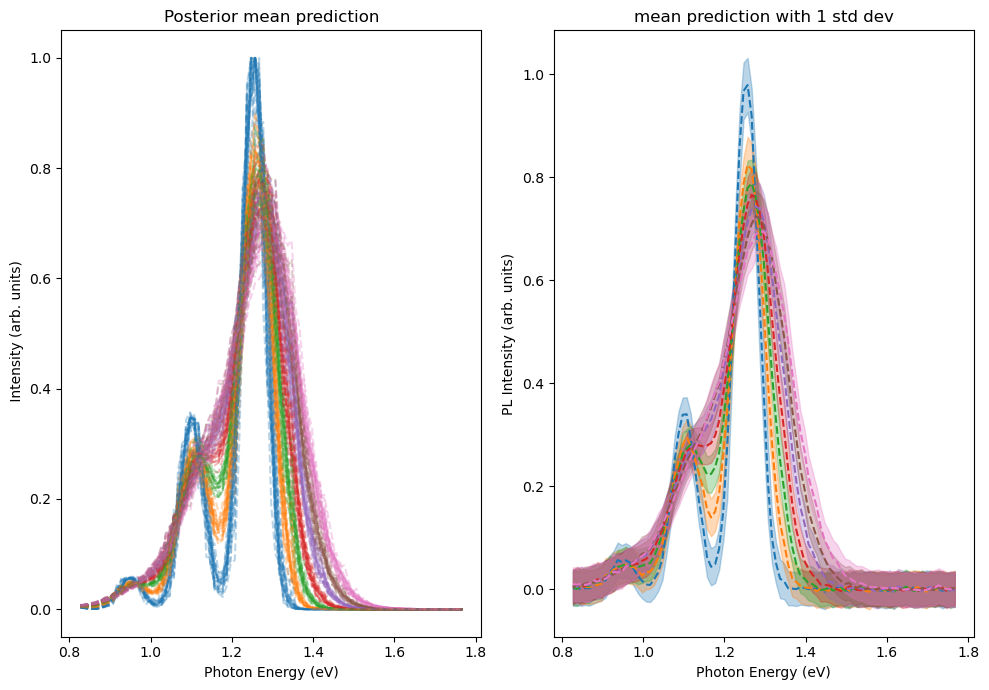

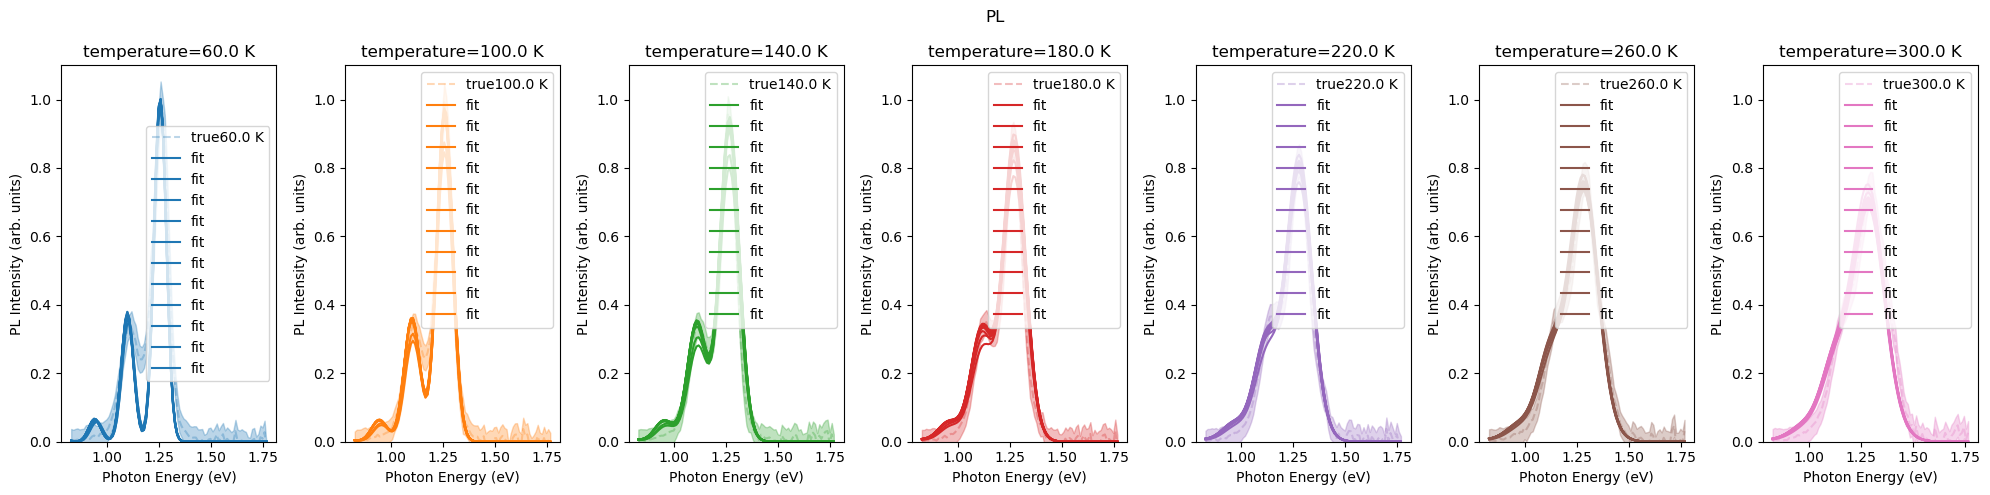

In [66]:
from pl_temp_fit import fit_pl_utils, covariance_utils
import json
def plot_fit_to_experimental_data(
    model_config_save,
    model_config,
    reader,
    discard=10,
    chains_list=None,
    filter_log_likelihood=False,
):
    """plot the fit to the experimental data
    model_config_save: the model config save dictionary
    model_config: the model config dictionary
    reader: the reader object from the emcee sampler
    discard: the number of samples to discard
    chains_list: the list of chains to plot
    """
    Temp_std_err = model_config_save["Temp_std_err"]
    hws_std_err = model_config_save["hws_std_err"]
    relative_intensity_std_error_pl = model_config_save[
        "relative_intensity_std_error_PL"
    ]
    sigma = model_config_save["sigma"]
    save_folder = model_config_save["save_folder"]
    fixed_parameters_dict = model_config_save["fixed_parameters_dict"]
    params_to_fit_init = model_config_save["params_to_fit_init"]
    min_bounds = model_config_save["min_bounds"]
    max_bounds = model_config_save["max_bounds"]
    csv_name = model_config_save["csv_name_pl"]
    fixed_parameters_dict["EX"]["disorder_ext"] = 2
    Exp_data, temperature_list, hws = Exp_data_utils.read_data(csv_name)
    distribution = reader.get_chain(discard=discard)
    if chains_list is not None:
        distribution = distribution[:, chains_list, :].reshape(
            -1, distribution.shape[-1]
        )
    else:
        distribution = distribution.reshape(-1, distribution.shape[-1])
        if filter_log_likelihood:
            blobs = reader.get_blobs(flat=True, discard=discard)
            distribution = distribution[
                blobs["log_likelihood"] > max(blobs["log_likelihood"]) * 1.1
            ]
    true_parameters = fit_pl_utils.get_param_dict(
        params_to_fit_init, distribution[-1]
    )  # model_config_save['params_to_fit_init']#
    co_var_mat_pl, variance_pl = covariance_utils.plot_generated_data_pl(
        save_folder,
        model_config,
        savefig=True,
        fixed_parameters_dict=fixed_parameters_dict,
        params_to_fit=true_parameters,
    )
    fig, ax = fit_pl_utils.plot_exp_data_with_variance(
        temperature_list,
        hws,
        variance_pl,
        save_folder,
        fixed_parameters_dict,
        true_parameters,
        Exp_data,
    )
    for true_parameters in distribution[
        np.random.choice(len(distribution), 10), :
    ]:

        true_parameters = fit_pl_utils.get_param_dict(
            params_to_fit_init, true_parameters
        )

        fig, ax = fit_pl_utils.plot_exp_data_with_variance(
            temperature_list,
            hws,
            variance_pl,
            save_folder,
            fixed_parameters_dict,
            true_parameters,
            Exp_data,
            fig=fig,
            axis=ax,
        )
    return fig, ax
def load_model_config(
    test_id,
    database_folder: Path,
):
    with Path(database_folder,f"{test_id}.json").open("r") as f:
        model_config_save = json.load(f)

    model_config = {
        "Temp_std_err": 0,
        "hws_std_err": 0,
        "relative_intensity_std_error_pl": 0,
        "relative_intensity_std_error_el": 0,
        "sigma": 0,
    }

    for keys in model_config:
        if keys in model_config_save:
            model_config[keys] = model_config_save[keys]


    import os
    if "csv_name_pl" in model_config_save:
       
        csv_name = model_config_save["csv_name_pl"]
        if os.path.exists(csv_name):
            Exp_data, temperature_list_pl, hws_pl = Exp_data_utils.read_data(
                csv_name
            )
            model_config["temperature_list_pl"] = temperature_list_pl
            model_config["hws_pl"] = hws_pl
        else:
            model_config["temperature_list_pl"] = []
            model_config["hws_pl"] = []
    if "csv_name_el" in model_config_save:
       

        csv_name = model_config_save["csv_name_el"]
        if os.path.exists(csv_name):
            Exp_data, temperature_list_el, hws_el = Exp_data_utils.read_data(
                csv_name
            )
            model_config["temperature_list_el"] = temperature_list_el
            model_config["hws_el"] = hws_el
        else:
            model_config["temperature_list_el"] = []
            model_config["hws_el"] = []

    return model_config, model_config_save
model_config, model_config_save = load_model_config(
    test_id, database_folder=databse_path
)
fig, ax = plot_fit_to_experimental_data(
    model_config_save,
    model_config,
    reader,
    discard=50,
    filter_log_likelihood=False,
)

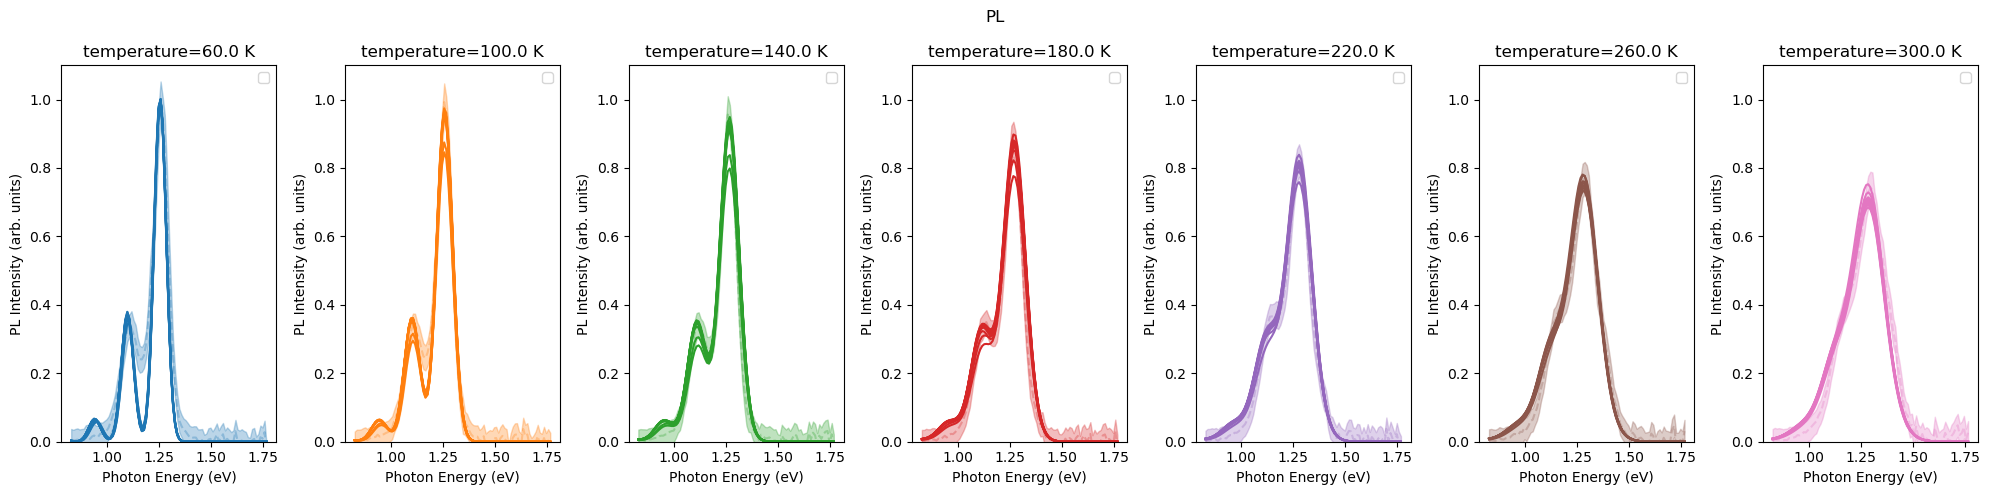

In [68]:
for _ax in ax:
    _ax.legend("")
fig.tight_layout()
fig